### This Notebook covers the usage as well as a brief background on the $\Lambda, \Lambda_2, \Lambda_3$ octahedral distortion parameters available within Pyrovskite:
#### The full derivation for these parameters is presented in the Pyrovskite manuscript, however a brief discussion of the parameters is presented here as well. If you find this set of descriptors useful, please consider citing [https://doi.org/10.1063/5.0159407] in your work.

---
#### ***Skip to Section 3 if you only need code snippets/examples for obtaining the $\Lambda$ parameters!***
---

## 1. Motivation
Work from the Draxl group (https://doi.org/10.1103/PhysRevB.105.155149) showed that Rashba/Dresselhaus spin splitting is, in some fashion, influenced by diagonal displacements of B-cations within $BX_6$ octahedra in CsPbI-perovskites. With this being the case, we seeked to formulate a descriptor for such dislocations that would be readily generalizable to a high-throughput setting. In doing so, we found this parameter to be sufficiently weakly correlated from existing distortion parameters to provide valuable information about the local octahedral distortions. 

***The plot below shows comparisons of correlations between pre-existing descriptors and the $\Lambda$ parameters***

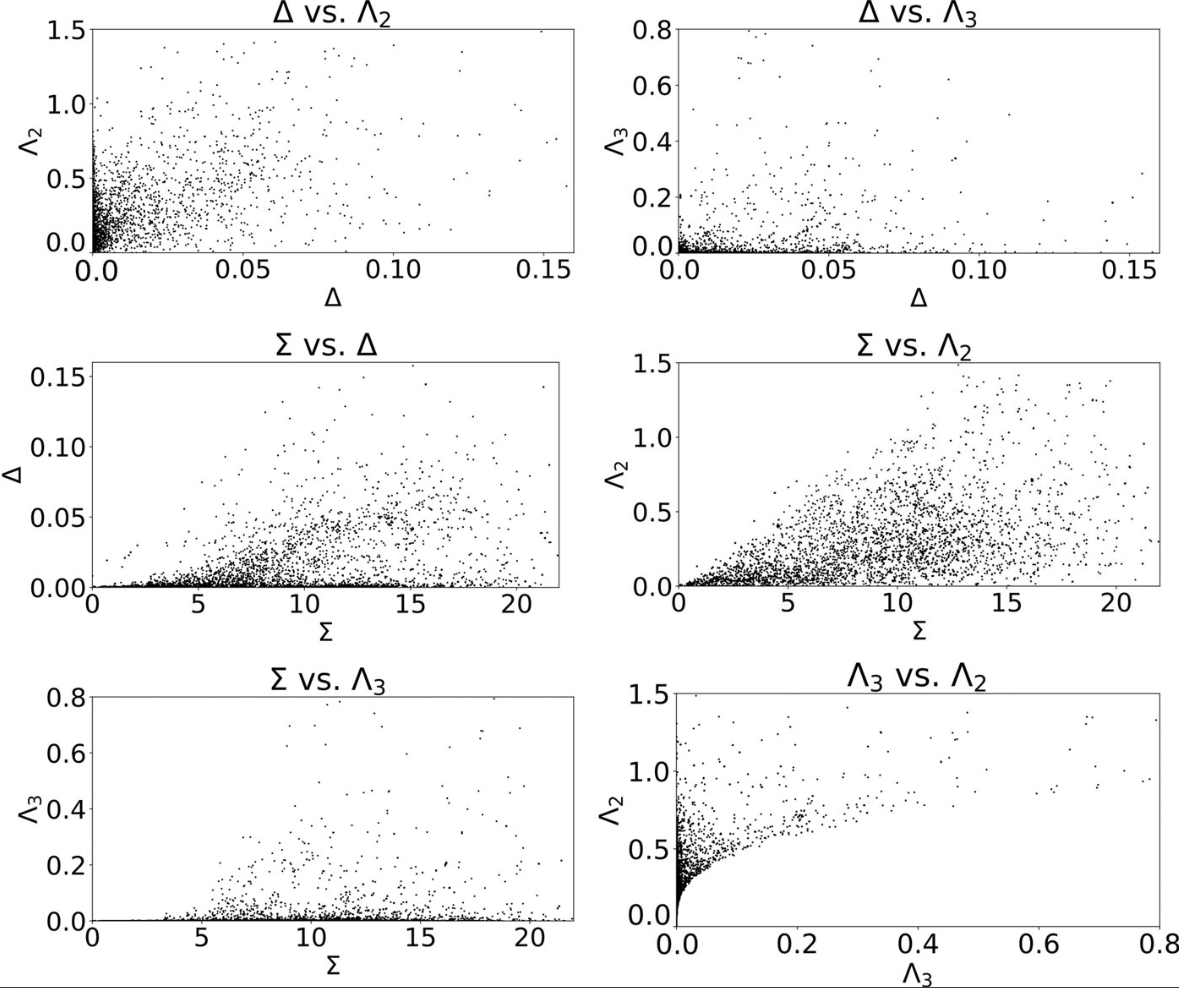

## 2. Procedure

The procedure for obtaining the diagonal dislocations can be very roughly broken down into two steps:
####  1. Determine a natural 'basis' for the octahedra.
This is done by way of forming a set of coordinate axes associated with the vector connecting the three pair of trans X-X atoms ($CD, EF,$ and $HG$ below). $\tilde{P}$ then represents the natural center of this (potentially distorted) octahedra. For perfectly symmetric $BX_6$ octahedra, $\tilde{P}$ will be equivalent to the location of the B-cation. ***Panel (a,b) below***.

#### 2. Project the B-cation dislocations in the planes formed by the above-mentioned basis.
Insofar as there are octahedral distortions, we denote the displacement vector $S$ between the location of the B-cation ($R_B$) and $\tilde{P}$. Then the procedure is as simple as projecting $S$ onto the natural basis of the octahedra. ***Panel (b) below***.

Once this is done, ratios are taken of the corresponding projections, and some scaling is applied to ensure sensible results. Large $\Lambda_2$ corresponds to large displacements within *at least* one of the planes of the octahedra. Large $\Lambda_3$ corresponds to large displacements within *all three* of the planes of the octahedra. The full details of these computations are presented in https://doi.org/10.1063/5.0159407. ***Panel (c) below shows three different scenarios which lead to three qualitatively different types of $\Lambda_3, \Lambda_2$ displacements.***


The code can also compute a ratio between the 2, 3 parameters (denoted simply $\Lambda$), but we've found it to be of limited use.
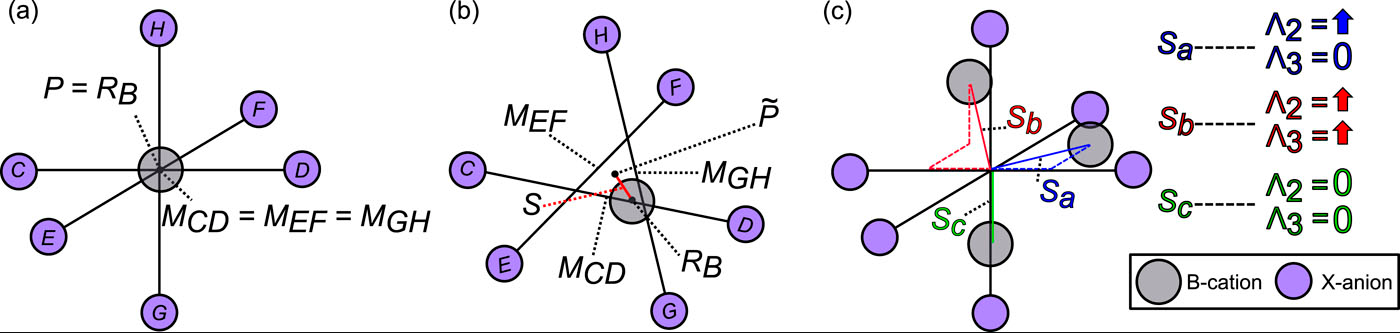

## 3. Usage 
Below are some commented examples utilizing the code to compute the $\Lambda$ parameters.

These can be returned in a number of ways, the main three of which are:
1. Return the average over all octahedra in the system.
2. Return for each individual octahedra.
3. Return both.


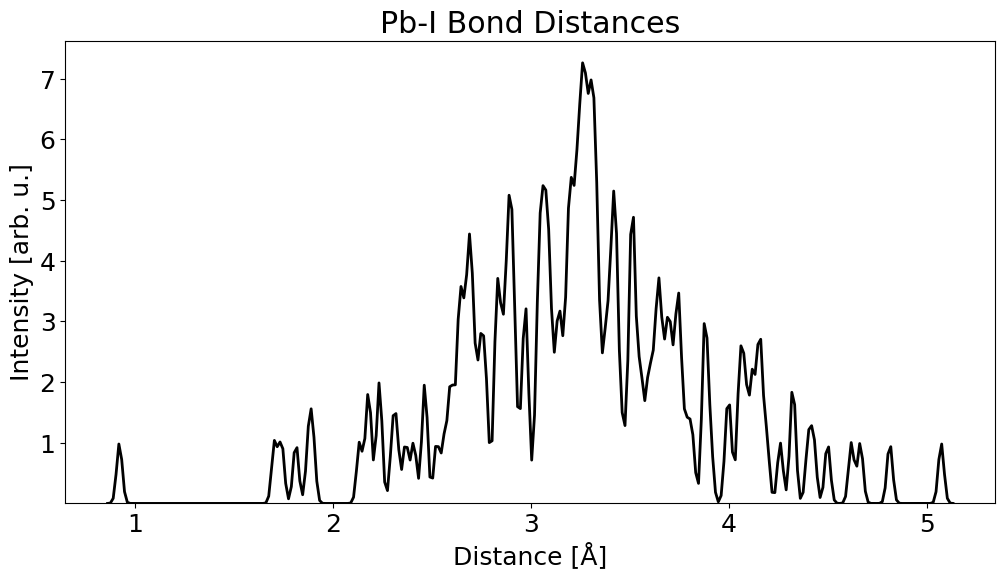

In [1]:
from pyrovskite.perovskite import Perovskite
from pyrovskite.builder import make_bulk
from ase.visualize import view

# First let's make a supercell of a CsPbI3 perovskite and rattle it so that we get some decent distortions.
atoms = make_bulk("Cs", "Pb", "I", 3.1).repeat((3,3,3))
atoms.rattle(.5)
perov = Perovskite(atoms, B = "Pb", X = "I")
perov.plot_distances()

# Here we ensure that we have a reasonable set of bond distributions.

# And optionally visualize the system:
# view(atoms)

## Now we can compute the parameters.
### ***Return only the averaged parameters.***

In [2]:
lambda_3_default, lambda_2_default = perov.compute_lambda(return_type = "lambda")
print(f"L3: {lambda_3_default}, L2: {lambda_2_default}")

# Note (note this is the same as the default)
lambda_3, lambda_2 = perov.compute_lambda()
print(f"L3: {lambda_3}, L2: {lambda_2}")

L3: 0.07325513728846657, L2: 0.43640275149441465
L3: 0.07325513728846657, L2: 0.43640275149441465


### ***Return the individual parameters.***

In [3]:
lambda_3_ind, lambda_2_ind = perov.compute_lambda(return_type = 'octahedra_lambda')
print(f'This has length {len(lambda_3_ind)}, e.g. the number of octahedra in the system (3*3*3 supercell)')
print(f"L3:\n{lambda_3_ind}\nL2:\n{lambda_2_ind}")

This has length 27, e.g. the number of octahedra in the system (3*3*3 supercell)
L3:
[3.69933369e-03 9.14548782e-02 9.82300547e-01 7.94907543e-05
 1.09414508e-02 2.83483760e-03 9.60388584e-04 1.05772294e-02
 1.90075433e-01 1.61932969e-03 2.03305714e-04 2.48553466e-01
 2.89130917e-05 2.97894543e-02 8.28563833e-03 1.74720724e-01
 5.00717030e-04 6.32909471e-02 2.82578160e-06 1.27526097e-03
 4.13556628e-03 3.65720393e-03 5.85720429e-03 4.96031730e-04
 1.18596284e-01 2.10349868e-02 2.91725880e-03]
L2:
[0.22842814 0.55237377 1.0714604  0.31241417 0.5517596  0.17969537
 0.34902234 0.4539275  0.64078979 0.43616078 0.44403331 0.74559685
 0.35797961 0.3477302  0.41812781 0.67151327 0.17928631 0.54363198
 0.05585934 0.13073871 0.26279729 0.43719619 0.38435805 0.10976096
 0.97055405 0.31006192 0.63761659]


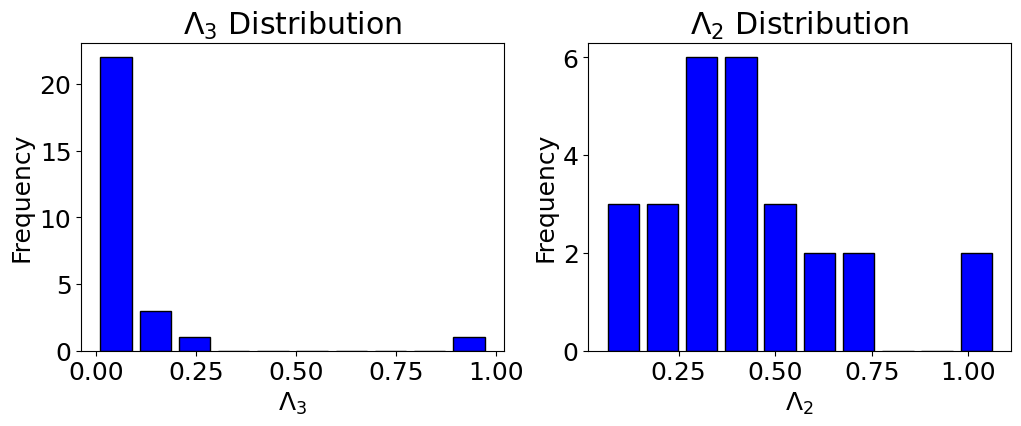

In [4]:
import matplotlib.pyplot as plt

plt.subplots(1,2, figsize = (12,4));

plt.subplot(1, 2, 1)
plt.hist(lambda_3_ind, bins = 10, rwidth = .8, edgecolor = 'k', color = 'blue');
plt.title("$\Lambda_3$ Distribution")
plt.ylabel("Frequency")
plt.xlabel("$\\Lambda_3$")

plt.subplot(1, 2, 2)
plt.hist(lambda_2_ind, bins = 10, rwidth = .8, edgecolor = 'k', color = 'blue');
plt.title("$\Lambda_2$ Distribution")
plt.ylabel("Frequency")
plt.xlabel("$\\Lambda_2$");

### ***Return the both the individual and averaged parameters.***

In [5]:
oct_lambda_3_both, oct_lambda_2_both, lambda_3_both, lambda_2_both = perov.compute_lambda(return_type = 'both')

In [6]:
# Quick check that these end up equalling the parameters from earlier that they should correspond to.
import numpy as np

print(np.allclose(oct_lambda_3_both, lambda_3_ind))
print(np.allclose(oct_lambda_2_both, lambda_2_ind))

print(np.allclose(lambda_2_both, lambda_2))
print(np.allclose(lambda_3_both, lambda_3))

print(np.allclose(lambda_2_default, lambda_2))
print(np.allclose(lambda_3_default, lambda_3))

True
True
True
True
True
True
